Занятие 3. DBScan кластеризация.
=============


In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import os

In [2]:
from sklearn.cluster import DBSCAN

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster



Пример 1. Beverage
--------

In [2]:
os.chdir("C:/Users/USER/Documents/Python/_AD_Python_part_1_Lectures/AD_Python_1_02_cluster/1_beverage/")

df = pd.read_csv("beverage_r.csv", sep=";", index_col='numb.obs')

In [8]:
#  Таблица pandas data frame
#  Данные + имена столбцов + имена строк

df.head()

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
numb.obs,,,,,,,,
1,1,0,0,0,1,1,0,1
2,1,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0
4,0,1,0,1,0,0,1,0
5,1,0,0,0,1,0,0,0


In [9]:
df_2 = df.copy()

#  df_2 = df


#### Подбираем параметры. Первый шаг. <br> 
Пользуемся значениями по умолчанию

In [17]:

#  Создадим объект DBSCAN, зададим значения параметров. 
#  Значения 3-х первых параметров совпадают со значениями "по умолчанию"
dbscan_1 = DBSCAN(eps=0.5, metric='euclidean', min_samples=5)


#  Обучим модель  DBSCAN
dbscan_1.fit(df)

#  к какому кластеру относится объект?
# В какой кластер попало наблюдение - Numpy массив номеров кластеров

dbscan_1.labels_


array([-1,  0,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [18]:
#  В numpy создаем таблицу частот 

#  Команда value_counts() работает с таблицами
#  Не работает dbscan_1.labels_.value_counts()

#  Нужна замена для value_counts() из pandas или замена table из R 
#  Вот вариант замены

unique, counts = np.unique(dbscan_1.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[-1 29]
 [ 0  5]]


Получили 29 кластеров, содержащих один объект и 
один кластер из пяти объектов
Не годится, подбираем значения параметров eps и min_samples 
Увеличиваем eps до 5

###  Подбираем параметры.  Второй шаг:  


In [12]:

dbscan_1 = DBSCAN(eps=5, metric='euclidean', min_samples=5)

dbscan_1.fit(df)


DBSCAN(algorithm='auto', eps=5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [15]:
#  Таблица частот 

unique, counts = np.unique(dbscan_1.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[ 0 34]]


Все объекты оказались в одном кластере, 
Уменьшаем eps и min_samples

In [21]:
dbscan_1 = DBSCAN(eps=2.1, metric='euclidean', min_samples=3)

dbscan_1.fit(df)

unique, counts = np.unique(dbscan_1.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[ 0 34]]


Не помогло, уменьшаем параметры

In [22]:
dbscan_1 = DBSCAN(eps=1.1, metric='euclidean', min_samples=3)

dbscan_1.fit(df)

unique, counts = np.unique(dbscan_1.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[-1  3]
 [ 0 20]
 [ 1 11]]


In [29]:
dbscan_1 = DBSCAN(eps=0.9, metric='euclidean', min_samples=3)

dbscan_1.fit(df)

unique, counts = np.unique(dbscan_1.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[-1 20]
 [ 0  5]
 [ 1  3]
 [ 2  3]
 [ 3  3]]


Модифицируем в другом направлении

In [31]:
dbscan_2 = DBSCAN(eps=1.1, metric='euclidean', min_samples=2)

dbscan_2.fit(df)

unique, counts = np.unique(dbscan_2.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[-1  3]
 [ 0  9]
 [ 1 11]
 [ 2 11]]


Размеры кластеров сопоставимы. Хоть что-то разумное... <br>
Интересно сравнить с результатами иерархического кластерного анализа этих же данных

In [23]:
# Объект, в котором будет хранится информация о последовательном слиянии кластеров
link = linkage(df, 'ward', 'euclidean')

In [24]:
# Информация о кластерах добавляется в таблицу данных в виде столбца!
df['cluster'] = fcluster(link, 3, criterion='maxclust')

In [25]:
# Информация о кластерах dbscan добавляется в таблицу данных в виде столбца!

df['dbscan_1'] = dbscan_1.labels_

In [26]:
#  print(df)

df.head()

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP,cluster,dbscan_1
numb.obs,,,,,,,,,,
1,1,0,0,0,1,1,0,1,3,0
2,1,0,0,0,1,0,0,0,2,0
3,1,0,0,0,1,0,0,0,2,0
4,0,1,0,1,0,0,1,0,1,1
5,1,0,0,0,1,0,0,0,2,0


In [27]:
print (df['dbscan_1'].value_counts())

 0    20
 1    11
-1     3
Name: dbscan_1, dtype: int64


In [28]:
tab = pd.crosstab(df['dbscan_1'], df['cluster'])

print(tab)


cluster    1   2  3
dbscan_1           
-1         0   0  3
 0         0  11  9
 1        11   0  0


In [32]:
df['dbscan_2'] = dbscan_2.labels_

In [33]:
#  Таблица сопряженности для двух кластеризаций

tab2 = pd.crosstab(df['dbscan_2'], df['cluster'])

print(tab2)


cluster    1   2  3
dbscan_2           
-1         0   0  3
 0         0   0  9
 1         0  11  0
 2        11   0  0


Получено почти то же решение, что и в иерархическом кластерном анализе.
В чем разница?

In [34]:
df.groupby('dbscan_2').mean()

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP,cluster,dbscan_1
dbscan_2,,,,,,,,,,
-1,0.333333,0.666667,0.333333,0.333333,0.000000,1.000000,0.333333,0.666667,3,-1.0
0,0.888889,0.111111,0.000000,0.000000,0.555556,0.888889,0.000000,0.444444,3,0.0
1,1.000000,0.272727,0.090909,0.000000,1.000000,0.000000,0.000000,0.272727,2,0.0
2,0.000000,1.000000,0.545455,0.545455,0.000000,0.000000,0.909091,0.000000,1,1.0


Пример 2. Кластеризация претендентов.
----------------------

In [4]:
os.chdir("C:/Users/USER/Documents/Python/_AD_Python_part_1_Lectures/AD_Python_1_02_cluster/2_pretendent")


In [5]:
df = pd.read_csv('assess.dat', sep='\t', index_col='NAME')
df.head()

,NR,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
NAME,,,,,,,,,,,
Volker,1,10,10,9,10,10,10,9,10,10,9
Sigrid,2,10,10,4,10,5,5,4,5,4,3
Elmar,3,5,4,10,5,10,4,10,5,3,10
Peter,4,10,10,9,10,10,10,9,10,10,9
Otto,5,4,3,5,4,3,10,4,10,10,5


In [6]:
# В колонке NR находится номер объекта, 
# его нужно исключить из данных для кластеризации
del df['NR']

In [7]:
#  Создадим объект DBSCAN, зададим значения параметров. 
#  Значения 3-х первых параметров совпадают со значениями "по умолчанию"
dbscan_1 = DBSCAN(eps=2, metric='euclidean', min_samples=4)


#  Обучим модель  DBSCAN clustering algorithm
dbscan_1.fit(df)

#  к какому кластеру относится объект?
# В какой кластер попало наблюдение - Numpy массив номеров кластеров

dbscan_1.labels_


array([ 0, -1, -1,  0, -1, -1, -1, -1,  1, -1,  1,  0, -1,  1,  0, -1, -1,
        1], dtype=int64)

In [8]:
unique, counts = np.unique(dbscan_1.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[-1 10]
 [ 0  4]
 [ 1  4]]


In [11]:
dbscan_1 = DBSCAN(eps=3.1, metric='euclidean', min_samples=3)

dbscan_1.fit(df)

unique, counts = np.unique(dbscan_1.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[-1  2]
 [ 0  4]
 [ 1  4]
 [ 2  5]
 [ 3  3]]


In [10]:
dbscan_1 = DBSCAN(eps=1.4, metric='euclidean', min_samples=3)

dbscan_1.fit(df)

unique, counts = np.unique(dbscan_1.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[-1 18]]


In [17]:
dbscan_1 = DBSCAN(eps=3.1, metric='euclidean', min_samples=3)

dbscan_1.fit(df)

unique, counts = np.unique(dbscan_1.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[-1  2]
 [ 0  4]
 [ 1  4]
 [ 2  5]
 [ 3  3]]


In [19]:
#  Таблица сопряженности для двух кластеризаций

tab2 = pd.crosstab(dbscan_1.labels_, df['cluster'])

print(tab2)


cluster  1  2  3  4
row_0              
-1       0  2  0  0
 0       0  0  4  0
 1       0  0  0  4
 2       5  0  0  0
 3       0  3  0  0


In [17]:
dbscan_1 = DBSCAN(eps=4.1, metric='euclidean', min_samples=3)

dbscan_1.fit(df)

unique, counts = np.unique(dbscan_1.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)


#  Таблица сопряженности для двух кластеризаций

tab2 = pd.crosstab(dbscan_1.labels_, df['cluster'])

print(tab2)



[[0 4]
 [1 4]
 [2 5]
 [3 5]]
cluster  1  2  3  4
row_0              
0        0  0  4  0
1        0  0  0  4
2        5  0  0  0
3        0  5  0  0


In [19]:
df.groupby('dbscan').mean()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,cluster
dbscan,,,,,,,,,,,
0,10.0,10.0,9.00,10.0,10.00,9.5,9.25,9.75,10.00,9.50,3
1,10.0,10.0,4.25,10.0,4.75,4.5,3.75,4.25,4.25,4.25,4
2,4.2,4.8,10.00,4.4,10.00,4.4,10.00,4.00,3.80,10.00,1
3,4.8,4.4,4.00,4.0,4.20,10.0,4.40,10.00,10.00,5.00,2


In [14]:
df.groupby('dbscan_1.labels_').mean()

KeyError: 'dbscan_1.labels_'

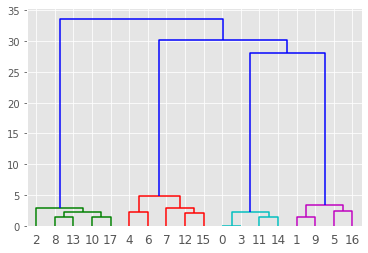

In [10]:
link = linkage(df, 'ward', 'euclidean')
dn = dendrogram(link)

In [11]:
df['cluster'] = fcluster(link, 4, criterion='maxclust')

In [14]:
df.groupby('cluster').mean()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
cluster,,,,,,,,,,
1,4.2,4.8,10.00,4.4,10.00,4.4,10.00,4.00,3.80,10.00
2,4.8,4.4,4.00,4.0,4.20,10.0,4.40,10.00,10.00,5.00
3,10.0,10.0,9.00,10.0,10.00,9.5,9.25,9.75,10.00,9.50
4,10.0,10.0,4.25,10.0,4.75,4.5,3.75,4.25,4.25,4.25


Пример 3. Потребление протеинов в Европе.
------------------

In [20]:
os.chdir("C:/Users/USER/Documents/Python/_AD_Python_part_1_Lectures/AD_Python_1_02_cluster/3_Protein Consumption in Europe")


In [21]:
df = pd.read_csv('Protein Consumption in Europe.csv', sep=';', decimal=',', index_col='Country')
df.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
Country,,,,,,,,,
Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


Стандартизация данных
--------------------
В этом примере данные, которые мы собираемся кластеризовать, хотя и находятся в одних и тех же единицах измерения, но местами они различаются почти на два порядка, так что будет не лишним их стандартизировать перед анализом. 

В модуле preprocessing библиотеки sklearn реализованы несколько классов стандартизации данных:
* StandardScaler -- приведение к нулевому среднему и единичной дисперсии.
* MinMaxScaler -- приведение данных к отрезку [0, 1].
* MaxAbsScaler -- приведение к [-1, 1] (рекомендуется для разреженных данных).

Замечание. У этих методов есть чуть более лёгкие методы-аналоги ```scale```, ```minmax_scale``` и ```maxabs_scale```, которые делают практически то же самое, но для supervized задач машинного обучения, которые встретяся позже, удобнее использовать именно изначально указанные классы.

Процесс стандартизации выглядит так:

In [22]:
from sklearn import preprocessing

# Выбираем один из вариантов нормализации

norm = preprocessing.StandardScaler()
# norm = preprocessing.MaxAbsScaler()
# norm = preprocessing.MinMaxScaler()

# вычисляем параметры нормализации (они будут сохранены внутри объекта norm)
norm.fit(df)
# преобразовываем данные с параметрами
X = norm.transform(df)
# Полученный на предыдущем шаге объект X -- это матрица класса numpy.ndarray.
# Глазами на неё смотреть неудобно, лучше преобразовать её в объект класса pandas.DataFrame.
X = pd.DataFrame(X, index=df.index, columns=df.columns)

In [23]:
X.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
Country,,,,,,,,,
Albania,0.082941,-1.794750,-2.224584,-1.179570,-1.225033,0.934804,-2.295965,1.247968,-1.378251
Austria,-0.282974,1.686446,1.245621,0.400468,-0.655111,-0.395051,-0.422218,-0.910790,0.092789
Belgium,1.119699,0.387905,1.062979,0.055732,0.064791,-0.525246,0.889405,-0.499598,-0.076947
Bulgaria,-0.618396,-0.523837,-1.220051,-1.265754,-0.925074,2.273959,-1.983674,0.322786,0.036210
Czechoslovakia,-0.039031,0.968104,-0.124197,-0.662467,-0.685107,0.190830,0.452198,-1.013588,-0.076947


In [39]:
dbscan_2 = DBSCAN(eps=2.1, metric='euclidean', min_samples=2)

dbscan_2.fit(X)

unique, counts = np.unique(dbscan_2.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[-1 10]
 [ 0  9]
 [ 1  3]
 [ 2  3]]


До сих пор мы подгоняли решение под кластеризацию, <br>
полученную ранее другой процедурой. <br>
Это нелогично, мы же надеемся получить новый взгляд на данные. <br>
Попробуем оценивать кластеры, основываясь на составе полученных кластеров.

In [40]:
df['dbscan'] = dbscan_2.labels_


df['dbscan'].sort_values()

Country
Albania          -1
USSR             -1
Spain            -1
Portugal         -1
Poland           -1
Hungary          -1
Greece           -1
France           -1
Italy            -1
Finland          -1
E_Germany         0
Ireland           0
W_Germany         0
Netherlands       0
Czechoslovakia    0
Belgium           0
Switzerland       0
UK                0
Austria           0
Bulgaria          1
Romania           1
Yugoslavia        1
Denmark           2
Norway            2
Sweden            2
Name: dbscan, dtype: int64

In [41]:
dbscan_2 = DBSCAN(eps=2.6, metric='euclidean', min_samples=1)

dbscan_2.fit(X)

unique, counts = np.unique(dbscan_2.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[ 0  1]
 [ 1 15]
 [ 2  4]
 [ 3  2]
 [ 4  1]
 [ 5  1]
 [ 6  1]]


In [42]:
df['dbscan'] = dbscan_2.labels_

df['dbscan'].sort_values()

Country
Albania           0
Norway            1
Netherlands       1
W_Germany         1
Ireland           1
Sweden            1
Switzerland       1
Poland            1
France            1
E_Germany         1
Denmark           1
Czechoslovakia    1
UK                1
Belgium           1
Austria           1
Finland           1
Romania           2
Yugoslavia        2
Hungary           2
Bulgaria          2
Greece            3
Italy             3
Portugal          4
Spain             5
USSR              6
Name: dbscan, dtype: int64

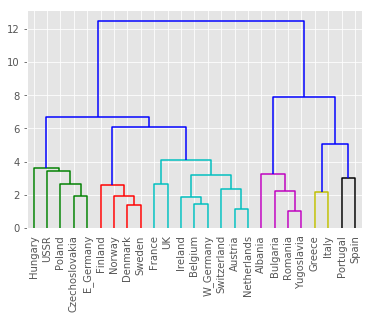

In [34]:
link = linkage(X, 'ward', 'euclidean')
dn = dendrogram(link,
                # массив с названиями объектов для подписи по оси X
                labels=X.index.tolist(),
                # опция для более красивого отображения слишком ветввистой дендрограммы
                truncate_mode='lastp',
                # повернуть подписи вертикально
                color_threshold=5,
                leaf_rotation=90.)

In [35]:
df['cluster'] = fcluster(link, 5, criterion='distance')

In [36]:
df.groupby('cluster').mean()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
cluster,,,,,,,,,
1,7.9200,10.0400,2.8400,13.8400,2.740,35.740,5.56,2.5400,4.260
2,9.8500,7.0500,3.1500,26.6750,8.225,22.675,4.55,1.1750,2.125
3,13.2125,10.6375,3.9875,21.1625,3.375,24.700,4.65,2.0625,4.175
4,7.1250,4.6750,1.2000,9.4500,0.750,51.125,1.95,5.0500,2.975
5,9.6000,4.0500,2.8500,15.6500,4.650,39.250,2.15,6.0500,6.600
6,6.6500,3.5500,2.1000,6.7500,10.600,28.100,5.80,5.3000,7.550
